In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# s = pd.Series(['orca', 0 , 2.1, 0., .5], index=entry)
# data = data.append(s, ignore_index=True)
# self.data.to_csv('{}/train_data{}.csv'.format(dir, suffix))
# df = pd.read_csv('{}/{}/{}'.format(dir, subfolder, csv_name)).drop(['Unnamed: 0'], axis=1)
# plt.figure()
# plt.savefig('{}/{}'.format(dir, name), dpi=200)
# plt.close()

load_dir = './metrics_0409'
seeds = ["seed1","seed2","seed3"]
# clde = 'clde/seed1/metric_seed17_model9400.csv'
# indep = 'indep/seed1/metric_seed17_model14600.csv'
# maddpg = 'mappo/seed1/metric_seed17_model5500.csv'
dfclde = []
dfindep = []
dfmappo = []
for seed in seeds:
    dfclde_i = pd.read_csv('{}/{}/{}/{}'.format(load_dir,"clde",seed,"metrics.csv")).drop(['Unnamed: 0'], axis=1)
    dfindep_i = pd.read_csv('{}/{}/{}/{}'.format(load_dir,"indep",seed,"metrics.csv")).drop(['Unnamed: 0'], axis=1)
    dfmappo_i = pd.read_csv('{}/{}/{}/{}'.format(load_dir,"mappo",seed,"metrics.csv")).drop(['Unnamed: 0'], axis=1)
    dfclde.append(dfclde_i)
    dfindep.append(dfindep_i)
    dfmappo.append(dfmappo_i)

In [2]:
num_test = len(dfclde)
print (num_test)

# collect = {'PV3agents': dfpos3[:num_seed],  
#            'PV5agents': dfpos5[:num_seed], 
#            'PV7agents': dfpos7[:num_seed],}

collect = {'clde': dfclde,
           'indep': dfindep,
           'mappo': dfmappo}

print (len(collect))

3
3


In [13]:
# initialize dataframes
epi_entry = ['Method', 'Input setting', 'Test index', 'Efficiency', 'Connectivity', 'Smoothness']
epi_title = {e:[] for e in epi_entry}
epi_data = pd.DataFrame(epi_title)

sum_entry = ['Method', 'Input setting', 'Success rate']
sum_title = {e:[] for e in sum_entry}
sum_data = pd.DataFrame(sum_title)

# collecting data
#setting = ['psv', 'psa', 'lidarv', 'lidara']
# setting = ['3agents', '4agents', '5agents', '6agents', '7agents', '8agents']
# figure_setting_name = ['3', '4', '5', '6', '7', '8'] #['4 agents', '5 agents', '6 agents', '7 agents']
methods = ['indep', 'mappo', 'clde']
figure_setting_name = ['Indep. PPO', 'MAPPO','Our method']
#comparing_method = ['independent ppo','decentralized ppo']
# input_setting = ['PV','LV']
# figure_input_setting = ['P+V','L+V']
input_setting = ['newrew_secondstage']
figure_input_setting = ['newrew_secondstage']

num_test = 100
total_test = num_test * len(seeds)
setting_ind = 0
for method in methods:
    sum_frame = []
    #list_efficiency = []
    #list_connectivity = []
    #list_smoothness = []
    #success_rate = 0
    inputsetting_ind = 0
    for inputs in input_setting:
        print (method, inputs, total_test)
        list_efficiency = []
        list_connectivity = []
        list_smoothness = []
        success_rate = 0
        env_id = 0
        for n in range(num_test):           
            for seed in range(len(seeds)):
                success_rate += 1 if collect[method][seed]['success_flag'][env_id] else 0 
                if collect[method][seed]['success_flag'][env_id]:
                    list_efficiency.append(collect[method][seed]['efficiency'][env_id])
                    list_connectivity.append(collect[method][seed]['connectivity'][env_id])
                list_smoothness.append(collect[method][seed]['smoothness'][env_id])
                
            env_id += 1
        
        #print(collect[method+s]['success_flag'])
        # episodic metrics
        #method_setting = [method for n in range(num_test*len(seed))]
        list_input_setting = [figure_input_setting[inputsetting_ind] for _ in range(total_test)]
        list_setting = [figure_setting_name[setting_ind] for _ in range(total_test)]
        list_test_index = list(range(total_test))
    
        # frame = [list_setting, list_test_index, list_efficiency, list_connectivity, list_smoothness]
        # frame = [list_setting, method_setting, list_test_index, list_efficiency, list_connectivity, list_smoothness]
        frame = [list_setting, list_input_setting, list_test_index, list_efficiency, list_connectivity, list_smoothness]
        sum_frame.append(frame)
        #print ("sum_frame size\n", sum_frame)
        
        frame = list(map(list, zip(*frame)))
    
        df = pd.DataFrame(frame, columns=epi_entry)
        epi_data = epi_data.append(df, ignore_index=True)
        
        # summarized metrics
        print ("length of effieciency and success_num", len(list_efficiency), success_rate)
        # success_rate /= 1.* (num_test*len(seed))
        success_rate /= 1.* (total_test)
        print ("setting {} input_setting {} success_rate {}".format(method, inputs,float(success_rate)))
        df = pd.Series([figure_setting_name[setting_ind], figure_input_setting[inputsetting_ind], success_rate], index=sum_entry)
        sum_data = sum_data.append(df, ignore_index=True)
        inputsetting_ind += 1
    setting_ind += 1

indep newrew_secondstage 300
length of effieciency and success_num 69 69
setting indep input_setting newrew_secondstage success_rate 0.23
mappo newrew_secondstage 300
length of effieciency and success_num 19 19
setting mappo input_setting newrew_secondstage success_rate 0.06333333333333334
clde newrew_secondstage 300
length of effieciency and success_num 263 263
setting clde input_setting newrew_secondstage success_rate 0.8766666666666667


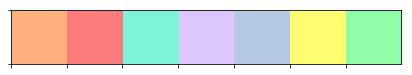

In [7]:
# color stuff
colors = ["peach", "salmon pink", "tiffany blue", "light lavender", "light blue grey", "pastel yellow", "foam green",  ]
#colors = ["leather","violet pink","shamrock green","dark orange", "mustard yellow","cerulean","pinkish purple","electric blue", "peach", "light blue grey", "pastel yellow"]
sns.set_palette(sns.xkcd_palette(colors))
sns.palplot(sns.xkcd_palette(colors))

/home/yangxuyun/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


<Figure size 576x576 with 0 Axes>

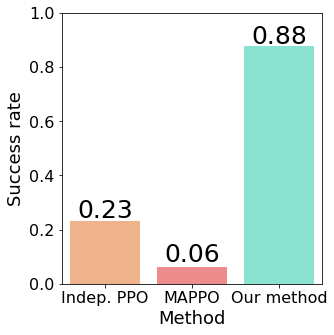

In [8]:
#sns.barplot(x='Setting', y='Success rate', hue="Method", data=sum_data,legend=False)
plt.close()
plt.figure(1,figsize = (8,8))
plt.rcParams.update({'font.size': 18})
success = sns.factorplot(x='Method', y='Success rate', kind="bar", data=sum_data, legend = False) #, height=6., aspect=1./1.) , hue="Input setting"
success.despine(left=False,top=False,right=False)
# plt.legend(loc='lower left',fontsize=17)  #'xx-large'
plt.tick_params(labelsize=16)
# plt.yticks(fontsize=25)
ax = plt.gca()
ax.set_ylim([0, 1])

# Iterate through the list of axes' patches
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height()-p.get_height()/100, '%.02f' % p.get_height(), 
           fontsize=25, color='black', ha='center', va='bottom')
plt.tight_layout()
plt.savefig('./metrics_0409/figs/success_rate_3seeds.png')

/home/yangxuyun/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


-0.0261006239918782
-0.04119208103082619
-0.0015654629787523204


<Figure size 576x576 with 0 Axes>

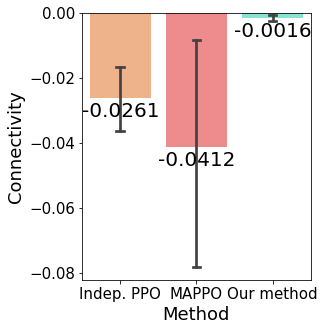

In [14]:
#sns.barplot(x="Setting", y="Connectivity", hue="Method", data=epi_data, capsize =.1)
plt.close()
plt.figure(2,figsize = (8,8))
plt.rcParams.update({'font.size': 18})
connectivity = sns.factorplot(x="Method", y="Connectivity", kind="bar", data=epi_data, capsize =.1, legend = False) #, height=6., aspect=1./1.) , hue="Input setting"
sns.despine(top=False, right=False) #top=False, right=False
# plt.legend(loc='lower left', fontsize=17)
plt.tick_params(labelsize=15)
# plt.yticks(fontsize=25)

ax = plt.gca()
# Iterate through the list of axes' patches
for p in ax.patches:
    print(p.get_height())
    ax.text(p.get_x() + p.get_width()/2., p.get_height()-0.007, '%.04f' % p.get_height(), 
           fontsize=20, color='black', ha='center', va='bottom')

plt.savefig('./metrics_0409/figs/success_connectivity_3seeds.png')

/home/yangxuyun/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


<Figure size 576x576 with 0 Axes>

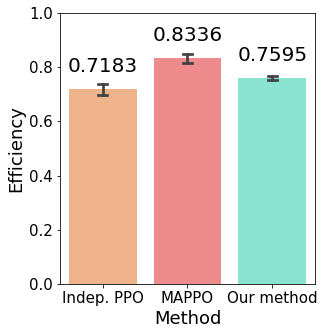

In [10]:
#sns.barplot(x="Setting", y="Efficiency", hue="Method", data=epi_data, capsize =.1)
plt.close()
plt.figure(3,figsize = (8,8))
plt.rcParams.update({'font.size': 18})
efficency = sns.factorplot(x="Method", y="Efficiency", kind='bar', data=epi_data, capsize =.1, legend = False) #, height=6., aspect=4./3.) hue="Input setting", 
efficency.despine(top=False, right=False)
# plt.legend(loc='lower left', fontsize=17)
plt.tick_params(labelsize=15)
# plt.yticks(fontsize=25)
plt.ylim(0.,1.)

ax = plt.gca()
# Iterate through the list of axes' patches
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height()+0.05, '%.04f' % p.get_height(), 
           fontsize=20, color='black', ha='center', va='bottom') # p.get_height()/100
    
plt.savefig('./metrics_0409/figs/efficiency_3seeds.png')